### Mason Manca
### CPSC 323
### Prof. Morehead
### 8 December 2022
### <center>Project 13: Lasso Regression  </center> 

In [22]:
import pandas as pd
import time as tm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

  

In [23]:
class Model():
    def __init__(self):
        self.X_train = self.y_train = self.X_test = self.y_test = self.df_binary = []
        self.timeOfModel = 0
        self.y_pred = 0
    
    def split_into_sets(self,df):
        self.df_binary = df[['Head Size(cm^3)','Brain Weight(grams)']]
        # Separating the data into independent and dependent variables
        # Converting each dataframe into a numpy array 
        X = np.array(self.df_binary['Head Size(cm^3)']).reshape(-1, 1)
        y = np.array(self.df_binary['Brain Weight(grams)']).reshape(-1, 1)
        # Splitting the data into training and testing data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.8) # 80% Test size
    
    def plot_and_test_lasso(self, df):
        
        # Splitting the data into training and testing data
        regr = Lasso()   
        regr.fit(self.X_train, self.y_train)
        sns.lmplot(x ="Head Size(cm^3)", y ="Brain Weight(grams)", data = df[['Head Size(cm^3)','Brain Weight(grams)']], ci = None ) # plot graph with data
        print("Fitting model to training data:")
        plt.show()
        
        # Begin testing of data
        plt.clf() # clear graph
        t0 = tm.time() # Start of the clock to determine performance
        self.y_pred = regr.predict(self.X_test)
        self.timeOfModel = tm.time() - t0 # Calculation of performance speed
        
        plt.scatter(self.X_test, self.y_test, color ='b')
        plt.plot(self.X_test, self.y_pred, color ='k')
        print("Testing Lasso Regression model")
        plt.show()
        print("coefficient of determination score: ", regr.score(self.X_test, self.y_test))
        print("Our correlation remains true through our model")
        
    def threshold_and_analysis(self):
        # TP = TN = FP = FN = 0
        # total = 238
        # # We can only recieve false positives and true positives since we are predicting a decimal value
        # # for accuracy within a range
        # for i in range(len(self.y_pred)): 
        #     if(self.y_pred[i] <= (self.y_test[i] + 100) and (self.y_pred[i] >= self.y_test[i] - 100)):
        #         TP += 1
        #     else:
        #         FP += 1
        # print("Accuracy: ", round((TP/total),2))

        # F1 score: F1 = 2 * (precision * recall) / (precision + recall)

        # precision = TP/(TP + FP) # in this case because of the model TP/(TP+FP)
        # recall = TP/(TP + FN)

        # F1_score = 2 * ((precision * recall) / (precision + recall))
        # print("F1 Score: ", f1_score(self.y_test, self.y_pred))
        print("Mean Squared Error: ", mean_squared_error(self.y_test, self.y_pred))
        print("Speed of Model (s): ", round(self.timeOfModel,9))
    
    def plot_and_test_linear(self, df):
            
        regr = LinearRegression()   
        regr.fit(self.X_train, self.y_train)
        
        # Begin testing of data
        self.y_pred = regr.predict(self.X_test)
        plt.clf()
        plt.scatter(self.X_test, self.y_test, color ='b')
        plt.plot(self.X_test, self.y_pred, color ='k')
        print("Testing Linear Regression model")
        plt.show()
        print("coefficient of determination score: ", regr.score(self.X_test, self.y_test))
        print("Our correlation remains true through our model")
    
    def plot_and_test_ridge(self,df):
        regr = LinearRegression()   
        regr.fit(self.X_train, self.y_train)
        
        # Begin testing of data
        self.y_pred = regr.predict(self.X_test)
        
        plt.clf()
        plt.scatter(self.X_test, self.y_test, color ='b')
        plt.plot(self.X_test, self.y_pred, color ='k')
        print("Testing Ridge regression model")
        plt.show()
        print("coefficient of determination score: ", regr.score(self.X_test, self.y_test))
        print("Our correlation remains true through our model")

Fitting model to training data:


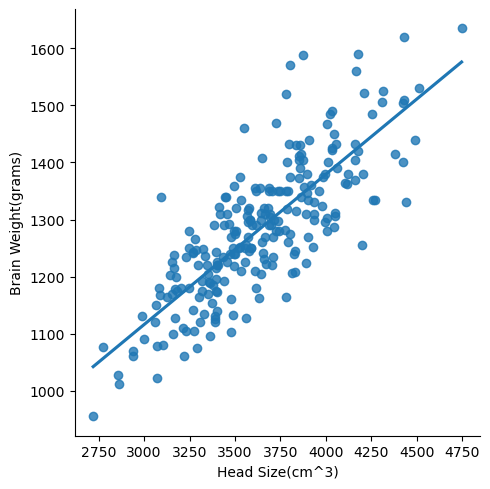

Testing Lasso Regression model


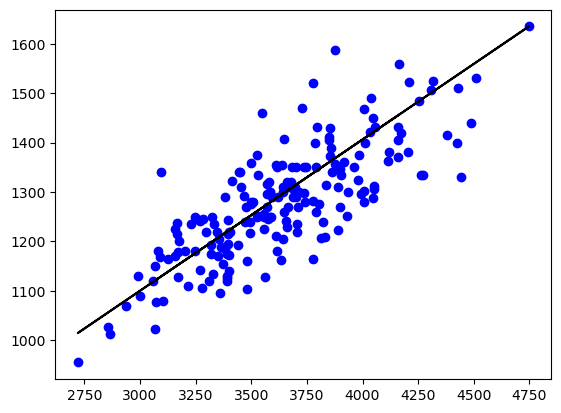

coefficient of determination score:  0.5845184630260887
Our correlation remains true through our model
Mean Squared Error:  5547.132164592335
Speed of Model (s):  8.5115e-05
Testing Linear Regression model


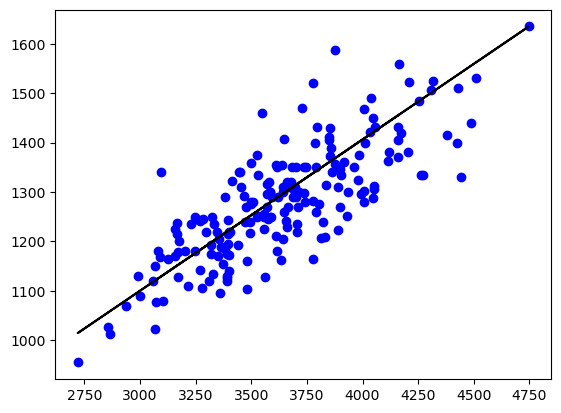

coefficient of determination score:  0.584510873393711
Our correlation remains true through our model
Mean Squared Error:  5547.233494471361
Speed of Model (s):  8.5115e-05
Testing Ridge regression model


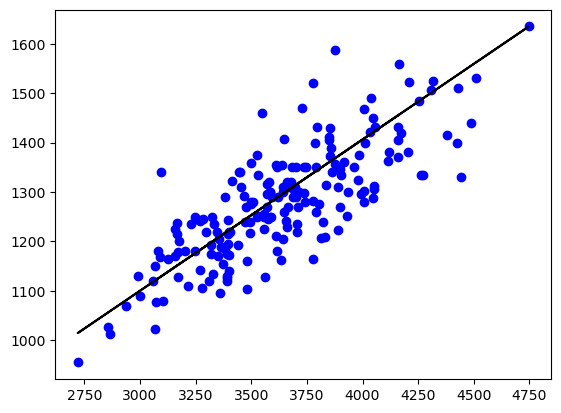

coefficient of determination score:  0.584510873393711
Our correlation remains true through our model
Mean Squared Error:  5547.233494471361
Speed of Model (s):  8.5115e-05


In [24]:
# Cell for output of data and time calculation
model = Model()

df = pd.read_csv('brain_weight.csv')

model.split_into_sets(df)
model.plot_and_test_lasso(df)
model.threshold_and_analysis()
model.plot_and_test_linear(df)
model.threshold_and_analysis()
model.plot_and_test_ridge(df)
model.threshold_and_analysis()


### With an Accuracy of roughly 70% as well as an F1 score, we can see that this model is somewhat good at predicting the weight of a brain from the size of a skull. Although, I used this same dataset for my linear regression model, which performed approximately the same. A Lasso regression is akin to a Linear regression, except it penalizes for the absolute values of the wieghts. This will reduce the values of the weights with many tending ot be zero. One would think with this extra penalization this model would be more accurate than either a Linear or a ridge based regression model.